In [1]:
import h2o
from h2o.transforms.decomposition import H2OPCA
h2o.init(max_mem_size_GB=2)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,10 mins 29 secs
H2O cluster version:,3.16.0.1
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_byungsangkim_z2ywfq
H2O cluster total nodes:,1
H2O cluster free memory:,1.761 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [8]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
import matplotlib.cm as cm
import copy
import tempfile
import os

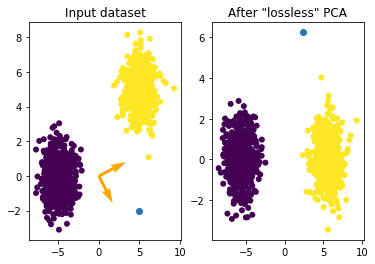

In [11]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA

X, y = make_blobs(n_samples=1000, random_state=101, \
                 centers=[[-5,0],[5,5]])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_comp = pca.components_.T

test_point = np.matrix([5,-2])
test_point_pca = pca.transform(test_point)

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='none')
plt.quiver(0,0, pca_comp[:,0], pca_comp[:,1], width=0.02, \
          scale=5, color='orange')
plt.plot(test_point[0, 0], test_point[0, 1], 'o')
plt.title('Input dataset')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='none')
plt.plot(test_point_pca[0, 0], test_point_pca[0, 1], 'o')
plt.title('After "lossless" PCA')

plt.show()

In [13]:
from sklearn.decomposition import RandomizedPCA
check_scability(RandomizedPCA)

NameError: name 'check_scability' is not defined

In [12]:
def testH2O_pca(nrows, ncols, k=20):
    temp_file = tempfile.NamedTemporaryFile().name
    X, _ = make_blobs(nrows, n_features=ncols, random_state=101)
    np.savetxt(temp_file, np.c_[X], delimiter=',')
    del X
    pca = H2OPCA(k=k, transform="NONE", pac_method="Power")
    tik = time.time()
    